In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

from bincounts import *

In [2]:
# Save sample of populations, while keeping total count
path = '/home/zack/stl/scoot/populationsim-master/example_msa_survey/all_outputs'
os.listdir(path)

percent_to_sample = .1
popsim_sample = []
tract_control_totals = []

for foldername in os.listdir(path):
    print(foldername)
    synthetic_p = pd.read_csv(f"{path}/{foldername}/synthetic_persons.csv")
    sample = synthetic_p.sample(int(percent_to_sample*len(synthetic_p)))
    popsim_sample.append(sample)
    
    controls = pd.read_csv(f"{path}/{foldername}/final_TRACT_control_data.csv")
    tract_control_totals.append(controls)

popsim_sample = pd.concat(popsim_sample)
# popsim_sample.drop(columns='Unnamed: 0', inplace=True)
tract_control_totals = pd.concat(tract_control_totals)
popsim_sample.to_csv(f"{path}/../combined_stats/popsim_sample.csv")
tract_control_totals.to_csv(f"{path}/../combined_stats/tract_control_totals.csv")

200_249
50_99
300_349
0_49
350_
150_199
250_299
100_149


### Control Variable Distributions

In [4]:
# Compare the counts of variables in the synthetic population with those in the ACS marginal tables
# Compare full region, as well as a random sample of 10 or so tracts visually
# Each MSA will need to be compared

In [5]:
path = '/home/zack/stl/scoot/populationsim-master/example_msa_survey/all_outputs'
popsim_sample = pd.read_csv(f"{path}/../combined_stats/popsim_sample.csv")
tract_control_totals = pd.read_csv(f"{path}/../combined_stats/tract_control_totals.csv")
geos = pd.read_csv(f"{path}/../../../data/TIGER/msa_puma_tract_join.csv")
labels = pd.read_csv(f"{path}/../configs/controls.csv")

/home/zack/miniconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [10]:
random_tracts = tract_control_totals.sample(1)

tract_geoids = []
var_names = []
synthetic_counts = []
marginal_counts = []

for i, tract in random_tracts.iterrows():
    geoid = int(tract['GEO_ID'][9:])
    persons = popsim_sample.loc[popsim_sample['TRACT']==geoid,]
    for i, control in labels.iloc[1:,].iterrows():
        synth_count = sum(eval(control['expression']))
        marg_count = tract[control['control_field']]
        
        tract_geoids.append(geoid)
        var_names.append(control['control_field'])
        synthetic_counts.append(synth_count*10)
        marginal_counts.append(marg_count)

random_tract_comparisons = pd.DataFrame(zip(tract_geoids, var_names, marginal_counts, synthetic_counts), columns=['tract_geoid','var_name','marginal_count','synthetic_count'])

In [11]:
random_tract_comparisons

,tract_geoid,var_name,marginal_count,synthetic_count
0,24510230200,age16-19,0,0
1,24510230200,age20-24,323,300
2,24510230200,age25-44,1002,1130
3,24510230200,age45-54,77,50
4,24510230200,age55-59,26,30
5,24510230200,age60+,65,70
6,24510230200,genderM,713,790
7,24510230200,genderF,782,790
8,24510230200,edu1-15,45100,1200
9,24510230200,edu16-17,124,40


/tmp/ipykernel_888/34403456.py:23: RuntimeWarning: invalid value encountered in true_divide
  pums_counts = list(get_bin_counts(pums_sample_p[var],bin_list[i])/sum(get_bin_counts(pums_sample_p[var],bin_list[i])))
/tmp/ipykernel_888/34403456.py:24: RuntimeWarning: invalid value encountered in true_divide
  popsim_counts = list(get_bin_counts(popsim_sample_p[var],bin_list[i])/sum(get_bin_counts(popsim_sample_p[var],bin_list[i])))


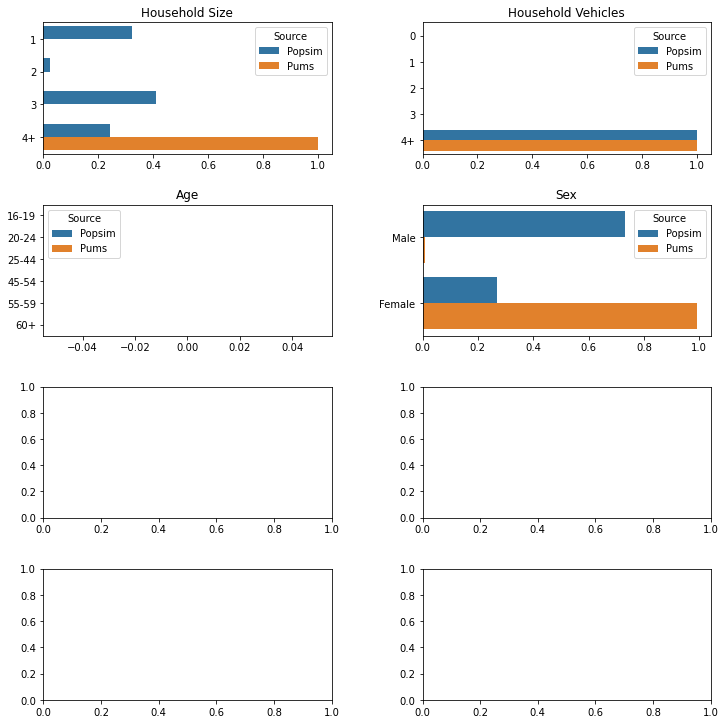

In [22]:
# Generate Barplot Distributions
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10,10))
fig.tight_layout(h_pad=3, w_pad=6)

var_list = ['PINCP','AGEP','SEX','SCHL']

for i,var in enumerate(var_list):
    # Handle household-level variables
    # if var in ['NP','VEH']:
    #     pums_counts = list(get_bin_counts(pums_sample_h[var],bin_list[i])/sum(get_bin_counts(pums_sample_h[var],bin_list[i])))
    #     popsim_counts = list(get_bin_counts(popsim_sample_h[var],bin_list[i])/sum(get_bin_counts(popsim_sample_h[var],bin_list[i])))

    # Handle tables where ACS tabulates NAs different than PUMS
    if var =='SCHL':
        over_24_pums_sample = pums_sample_p[pums_sample_p['AGEP']>=25]
        pums_counts = list(get_bin_counts(over_24_pums_sample[var],bin_list[i])/sum(get_bin_counts(over_24_pums_sample[var],bin_list[i])))
        over_24_popsim_sample = popsim_sample_p[popsim_sample_p['AGEP']>=25] # Change to this after fixing SCHL >24 input controls
        over_24_popsim_sample = popsim_sample_p
        popsim_counts = list(get_bin_counts(over_24_popsim_sample[var],bin_list[i])/sum(get_bin_counts(over_24_popsim_sample[var],bin_list[i])))
        
    # Otherwise handle plain person-level variables
    else:
        pums_counts = list(get_bin_counts(pums_sample_p[var],bin_list[i])/sum(get_bin_counts(pums_sample_p[var],bin_list[i])))
        popsim_counts = list(get_bin_counts(popsim_sample_p[var],bin_list[i])/sum(get_bin_counts(popsim_sample_p[var],bin_list[i])))

    # Bring together bin counts to make barplot
    sampled_counts = pd.DataFrame()
    sampled_counts['density'] = popsim_counts + pums_counts
    sampled_counts['Source'] = ['Popsim' for i in range(1,len(bin_list[i]))] + ['Pums' for i in range(1,len(bin_list[i]))]
    sampled_counts['Group'] = bin_names_list[i]*2
    sns.barplot(x="density", y="Group", hue="Source", data=sampled_counts, ax=axes.flatten()[i], orient='h')
    axes.flatten()[i].set_title(var_names_list[i])
    axes.flatten()[i].set_xlabel(None)
    axes.flatten()[i].set_ylabel(None)

In [ ]:
fig

In [ ]:
fig.savefig('control_distributions.png', dpi=300)